## Team Project - 5. Find out the relationship between days of school closures and cases in the country / region

### School closures and Covid-19 Cases in country Anaysis

### data cleasing

In [306]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


In [307]:
# Import our input dataset
covid_youth_df = pd.read_csv('Resources/covid_youth.csv')
covid_youth_df.head()

,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,02/24/2020,NaN,NaN,NaN,1.0,1.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
1,AFG,02/25/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
2,AFG,02/26/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
3,AFG,02/27/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
4,AFG,02/28/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511


In [308]:
# Import our input dataset
covid_education_df = pd.read_csv('Resources/covid_education.csv')
covid_education_df.head()

,Country,Status,Note,iso_code,date
0,Aruba,Fully open,NaN,ABW,02/16/2020
1,Afghanistan,Fully open,NaN,AFG,02/16/2020
2,Angola,Fully open,NaN,AGO,02/16/2020
3,Anguilla,Fully open,NaN,AIA,02/16/2020
4,Albania,Fully open,NaN,ALB,02/16/2020


In [309]:
covid_youth_df.shape

(72590, 15)

In [310]:
# Columns 
covid_youth_df.columns

Index(['iso_code', 'date', 'total_vaccinations', 'people_vaccinated',
       'total_deaths', 'total_cases', 'new_cases', 'new_deaths',
       'population_density', 'gdp_per_capita', 'handwashing_facilities',
       'diabetes_prevalence', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

In [311]:
# List dataframe data types
covid_youth_df.dtypes

iso_code                       object
date                           object
total_vaccinations            float64
people_vaccinated             float64
total_deaths                  float64
total_cases                   float64
new_cases                     float64
new_deaths                    float64
population_density            float64
gdp_per_capita                float64
handwashing_facilities        float64
diabetes_prevalence           float64
hospital_beds_per_thousand    float64
life_expectancy               float64
human_development_index       float64
dtype: object

In [312]:
# Find null values
for column in covid_youth_df.columns:
    print(f"Column {column} has {covid_youth_df[column].isnull().sum()} null values")

Column iso_code has 0 null values
Column date has 0 null values
Column total_vaccinations has 69385 null values
Column people_vaccinated has 69876 null values
Column total_deaths has 10172 null values
Column total_cases has 1060 null values
Column new_cases has 1062 null values
Column new_deaths has 10014 null values
Column population_density has 4770 null values
Column gdp_per_capita has 6441 null values
Column handwashing_facilities has 39093 null values
Column diabetes_prevalence has 4962 null values
Column hospital_beds_per_thousand has 11438 null values
Column life_expectancy has 3613 null values
Column human_development_index has 5861 null values


In [313]:
# Find duplicate entries
print(f"Duplicate entries: {covid_youth_df.duplicated().sum()}")

Duplicate entries: 0


In [314]:
# Print out the iso_code value counts
iso_code_counts = covid_youth_df.iso_code.value_counts()
iso_code_counts

MEX         428
ARG         428
THA         425
TWN         413
KOR         408
           ... 
FLK          16
MSR          16
MAC          11
OWID_NCY      9
SHN           1
Name: iso_code, Length: 215, dtype: int64

In [315]:
#shape
covid_education_df.shape

(86100, 5)

In [316]:
# Columns 
covid_education_df.columns

Index(['Country', 'Status', 'Note', 'iso_code', 'date'], dtype='object')

In [317]:
# List dataframe data types
covid_education_df.dtypes

Country     object
Status      object
Note        object
iso_code    object
date        object
dtype: object

In [318]:
# Find null values
for column in covid_education_df.columns:
    print(f"Column {column} has {covid_education_df[column].isnull().sum()} null values")

Column Country has 0 null values
Column Status has 0 null values
Column Note has 85286 null values
Column iso_code has 0 null values
Column date has 0 null values


In [319]:
# Print out the iso_code value counts
iso_code_counts_education = covid_education_df.iso_code.value_counts()
iso_code_counts_education

YEM    410
CUW    410
BWA    410
NIC    410
TCA    410
      ... 
NPL    410
GNQ    410
STP    410
COL    410
SLV    410
Name: iso_code, Length: 210, dtype: int64

In [320]:
# merge 2 tables where iso_code = iso_code
covid_school_df = covid_youth_df.merge(covid_education_df, how="left", on=["iso_code", "date"])
covid_school_df

,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,Country,Status,Note
0,AFG,02/24/2020,NaN,NaN,NaN,1.0,1.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511,Afghanistan,Fully open,NaN
1,AFG,02/25/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511,Afghanistan,Fully open,NaN
2,AFG,02/26/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511,Afghanistan,Fully open,NaN
3,AFG,02/27/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511,Afghanistan,Fully open,NaN
4,AFG,02/28/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511,Afghanistan,Fully open,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72585,ZWE,02/27/2021,15705.0,15705.0,1463.0,36058.0,14.0,0.0,42.729,1899.775,36.791,1.82,1.7,61.49,0.571,Zimbabwe,Closed due to COVID-19,NaN
72586,ZWE,02/28/2021,18843.0,18843.0,1463.0,36089.0,31.0,0.0,42.729,1899.775,36.791,1.82,1.7,61.49,0.571,Zimbabwe,Closed due to COVID-19,NaN
72587,ZWE,03/01/2021,21456.0,21456.0,1468.0,36115.0,26.0,5.0,42.729,1899.775,36.791,1.82,1.7,61.49,0.571,Zimbabwe,Academic break,NaN
72588,ZWE,03/02/2021,25077.0,25077.0,1472.0,36148.0,33.0,4.0,42.729,1899.775,36.791,1.82,1.7,61.49,0.571,Zimbabwe,Closed due to COVID-19,NaN


In [321]:
# Columns 
covid_school_df.shape

(72590, 18)

In [322]:
# Columns 
covid_school_df.columns

Index(['iso_code', 'date', 'total_vaccinations', 'people_vaccinated',
       'total_deaths', 'total_cases', 'new_cases', 'new_deaths',
       'population_density', 'gdp_per_capita', 'handwashing_facilities',
       'diabetes_prevalence', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'Country', 'Status', 'Note'],
      dtype='object')

In [323]:
# Find null values
for column in covid_school_df.columns:
    print(f"Column {column} has {covid_school_df[column].isnull().sum()} null values")

Column iso_code has 0 null values
Column date has 0 null values
Column total_vaccinations has 69385 null values
Column people_vaccinated has 69876 null values
Column total_deaths has 10172 null values
Column total_cases has 1060 null values
Column new_cases has 1062 null values
Column new_deaths has 10014 null values
Column population_density has 4770 null values
Column gdp_per_capita has 6441 null values
Column handwashing_facilities has 39093 null values
Column diabetes_prevalence has 4962 null values
Column hospital_beds_per_thousand has 11438 null values
Column life_expectancy has 3613 null values
Column human_development_index has 5861 null values
Column Country has 12182 null values
Column Status has 12182 null values
Column Note has 71877 null values


In [324]:
# remove the column
covid_schoolclosure_df = covid_school_df[['iso_code', 'total_cases', 'new_cases','total_deaths', 'human_development_index', 'Status']]
covid_schoolclosure_df.head()

,iso_code,total_cases,new_cases,total_deaths,human_development_index,Status
0,AFG,1.0,1.0,NaN,0.511,Fully open
1,AFG,1.0,0.0,NaN,0.511,Fully open
2,AFG,1.0,0.0,NaN,0.511,Fully open
3,AFG,1.0,0.0,NaN,0.511,Fully open
4,AFG,1.0,0.0,NaN,0.511,Fully open


In [325]:
# remove rows with null values
covid_schoolclosure_df = covid_schoolclosure_df.dropna(subset = ['Status', 'human_development_index', 'total_deaths', 'new_cases', 'total_cases'])
covid_schoolclosure_df.head() 

,iso_code,total_cases,new_cases,total_deaths,human_development_index,Status
27,AFG,34.0,4.0,1.0,0.511,Closed due to COVID-19
28,AFG,41.0,7.0,1.0,0.511,Closed due to COVID-19
29,AFG,43.0,2.0,1.0,0.511,Closed due to COVID-19
30,AFG,76.0,33.0,2.0,0.511,Closed due to COVID-19
31,AFG,80.0,4.0,3.0,0.511,Closed due to COVID-19


In [326]:
# Columns 
covid_schoolclosure_df.shape

(51199, 6)

In [327]:
# Find null values after drop
for column in covid_schoolclosure_df.columns:
    print(f"Column {column} has {covid_schoolclosure_df[column].isnull().sum()} null values")

Column iso_code has 0 null values
Column total_cases has 0 null values
Column new_cases has 0 null values
Column total_deaths has 0 null values
Column human_development_index has 0 null values
Column Status has 0 null values


In [328]:
# Columns 
covid_schoolclosure_df.columns

Index(['iso_code', 'total_cases', 'new_cases', 'total_deaths',
       'human_development_index', 'Status'],
      dtype='object')

In [330]:
# Print out the school status value counts
Status_counts = covid_schoolclosure_df.Status.value_counts()
Status_counts

Closed due to COVID-19    16121
Fully open                13095
Academic break            11841
Partially open            10142
Name: Status, dtype: int64

In [331]:
# export to csv

covid_schoolclosure_df
covid_schoolclosure_df.to_csv ('Resources\covid_schoolclosure.csv', index = False, header=True)

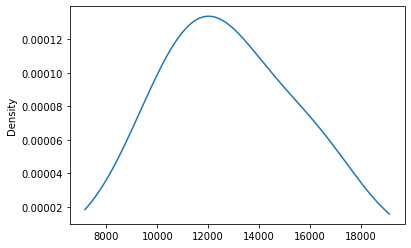

In [332]:
# Visualize the value counts
Status_counts.plot.density()

In [333]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(covid_schoolclosure_df.Status.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Status_counts'])
encode_df.head()

,Status_counts_Academic break,Status_counts_Closed due to COVID-19,Status_counts_Fully open,Status_counts_Partially open
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [334]:
# Merge the two DataFrames together and drop the Status column
df = covid_schoolclosure_df.merge(encode_df,left_index=True,right_index=True).drop("Status",1)
df

,iso_code,total_cases,new_cases,total_deaths,human_development_index,Status_counts_Academic break,Status_counts_Closed due to COVID-19,Status_counts_Fully open,Status_counts_Partially open
27,AFG,34.0,4.0,1.0,0.511,0.0,1.0,0.0,0.0
28,AFG,41.0,7.0,1.0,0.511,0.0,1.0,0.0,0.0
29,AFG,43.0,2.0,1.0,0.511,0.0,1.0,0.0,0.0
30,AFG,76.0,33.0,2.0,0.511,0.0,1.0,0.0,0.0
31,AFG,80.0,4.0,3.0,0.511,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
51194,PRY,836.0,3.0,11.0,0.728,0.0,1.0,0.0,0.0
51195,PRY,838.0,2.0,11.0,0.728,0.0,1.0,0.0,0.0
51196,PRY,850.0,12.0,11.0,0.728,1.0,0.0,0.0,0.0
51197,PRY,862.0,12.0,11.0,0.728,0.0,1.0,0.0,0.0


In [335]:
# remove the column
df=df.drop(['iso_code'],axis=1)
df


,total_cases,new_cases,total_deaths,human_development_index,Status_counts_Academic break,Status_counts_Closed due to COVID-19,Status_counts_Fully open,Status_counts_Partially open
27,34.0,4.0,1.0,0.511,0.0,1.0,0.0,0.0
28,41.0,7.0,1.0,0.511,0.0,1.0,0.0,0.0
29,43.0,2.0,1.0,0.511,0.0,1.0,0.0,0.0
30,76.0,33.0,2.0,0.511,0.0,1.0,0.0,0.0
31,80.0,4.0,3.0,0.511,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
51194,836.0,3.0,11.0,0.728,0.0,1.0,0.0,0.0
51195,838.0,2.0,11.0,0.728,0.0,1.0,0.0,0.0
51196,850.0,12.0,11.0,0.728,1.0,0.0,0.0,0.0
51197,862.0,12.0,11.0,0.728,0.0,1.0,0.0,0.0


In [336]:
# Print out the total_cases value counts
total_cases_counts = df.total_cases.value_counts()
total_cases_counts

141.0       101
82.0         78
148.0        68
25.0         58
18.0         58
           ... 
157626.0      1
27370.0       1
55791.0       1
12270.0       1
69589.0       1
Name: total_cases, Length: 23526, dtype: int64

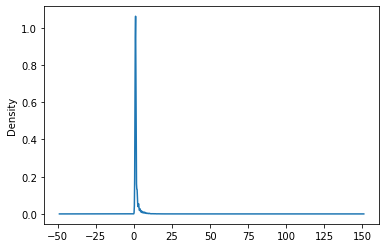

In [337]:
total_cases_counts.plot.density()

In [338]:
# Print out the total_deaths value counts
total_deaths_counts = df.total_deaths.value_counts()
total_deaths_counts

1.0         1407
3.0          913
2.0          847
10.0         704
7.0          699
            ... 
157157.0       1
15700.0        1
3534.0         1
78586.0        1
12849.0        1
Name: total_deaths, Length: 8353, dtype: int64

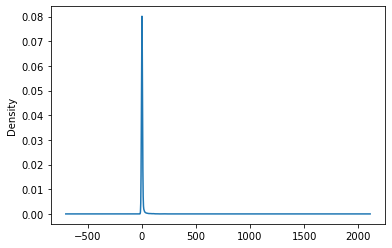

In [339]:
total_deaths_counts.plot.density()

In [340]:
# Print out the total_new_cases value counts
new_cases_counts = df.new_cases.value_counts()
new_cases_counts

0.0       5934
1.0        861
2.0        602
3.0        513
4.0        436
          ... 
2192.0       1
9056.0       1
3447.0       1
6261.0       1
5884.0       1
Name: new_cases, Length: 5392, dtype: int64

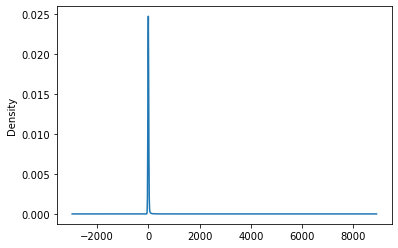

In [341]:
new_cases_counts.plot.density()

In [342]:
# export to csv

df.to_csv ('Resources\school_df.csv', index = False, header=True)

In [343]:
df.columns

Index(['total_cases', 'new_cases', 'total_deaths', 'human_development_index',
       'Status_counts_Academic break', 'Status_counts_Closed due to COVID-19',
       'Status_counts_Fully open', 'Status_counts_Partially open'],
      dtype='object')

In [344]:
df.dtypes

total_cases                             float64
new_cases                               float64
total_deaths                            float64
human_development_index                 float64
Status_counts_Academic break            float64
Status_counts_Closed due to COVID-19    float64
Status_counts_Fully open                float64
Status_counts_Partially open            float64
dtype: object

In [345]:
# Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "float64"].index.tolist()
df_cat

['total_cases',
 'new_cases',
 'total_deaths',
 'human_development_index',
 'Status_counts_Academic break',
 'Status_counts_Closed due to COVID-19',
 'Status_counts_Fully open',
 'Status_counts_Partially open']

In [346]:
# Check the number of unique values in each column
df[df_cat].nunique()

total_cases                             23526
new_cases                                5392
total_deaths                             8353
human_development_index                   111
Status_counts_Academic break                2
Status_counts_Closed due to COVID-19        2
Status_counts_Fully open                    2
Status_counts_Partially open                2
dtype: int64

In [347]:
# Split our preprocessed data into our features and target arrays
y = df["Status_counts_Academic break"].values
X = df.drop(["Status_counts_Closed due to COVID-19", "Status_counts_Fully open", 
       "Status_counts_Partially open"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train[1].dtype

dtype('float64')

In [348]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Deliverable 2: Compile, Train and Evaluate the Model

At last, our data is preprocessed and separated and ready for modelling. For our purposes, we will use the same framework we used for our basic neural network:

For our input layer, we must add the number of input features equal to the number of variables in our feature DataFrame.

In our hidden layers, our deep learning model structure will be slightly different—we’ll add two hidden layers with only a few neurons in each layer. To create the second hidden layer, we’ll add another Keras Dense class while defining our model. All of our hidden layers will use the relu activation function to identify nonlinear characteristics from the input values.

In the output layer, we’ll use the same parameters from our basic neural network including the sigmoid activation function. The sigmoid activation function will help us predict the probability that an applicant will be successful if funded by Alphabet Soup.

In [349]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 6         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [350]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [351]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
871/871 [==============================] - 1s 811us/step - loss: 7136.4894 - accuracy: 0.5156
Epoch 2/100
871/871 [==============================] - 1s 842us/step - loss: 0.7114 - accuracy: 0.7677
Epoch 3/100
871/871 [==============================] - 1s 881us/step - loss: 0.5899 - accuracy: 0.7674
Epoch 4/100
871/871 [==============================] - 1s 828us/step - loss: 0.6567 - accuracy: 0.7716
Epoch 5/100
871/871 [==============================] - 1s 838us/step - loss: 0.6359 - accuracy: 0.7750
Epoch 6/100
871/871 [==============================] - 1s 884us/step - loss: 0.6010 - accuracy: 0.7749
Epoch 7/100
871/871 [==============================] - 1s 940us/step - loss: 0.5907 - accuracy: 0.7789
Epoch 8/100
871/871 [==============================] - 1s 893us/step - loss: 0.5343 - accuracy: 0.7800
Epoch 9/100
871/871 [==============================] - 1s 835us/step - loss: 0.5350 - accuracy: 0.7824
Epoch 10/100
871/871 [==============================] - 1s 909us/step 

In [352]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

291/291 - 0s - loss: 0.4628 - accuracy: 0.8031
Loss: 0.4628276824951172, Accuracy: 0.8030580282211304


In [353]:
# Define model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 6         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


### Deliverable 3: Optimize the Model


As with all machine learning algorithms, neural networks are not perfect and will often underperform using a basic implementation. When a neural network model does not meet performance expectations, it is usually due to one of two causes: inadequate or inappropriate model design for a given dataset, or insufficient or ineffective training data. Although collecting more training/test data is almost always beneficial, it may be impossible due to budget or logistical limitations. Therefore, the most straightforward means of improving neural network performance is tweaking the model design and parameters.

When it comes to tweaking a neural network model, a little can go a long way. If we tweak too many design aspects and parameters at once, we can cause a model to become less effective without a means of understanding why. To avoid trapping ourselves in endless optimization iterations, we can use characteristics of our input data to determine what parameters should be changed.

There are a few means of optimizing a neural network:

Check out your input dataset.
Add more neurons to a hidden layer.
Add additional hidden layers.
Use a different activation function for the hidden layers.
Add additional epochs to the training regimen.
Check Out Your Input Dataset Before we start down the endless journey of model optimization, it is always a good idea to check the input data and ensure that there are no variables or set of outliers that are causing the model to be confused. Although neural networks are tolerant of noisy characteristics in a dataset, neural networks can learn bad habits (like the brain does). Even if we standardize and scale our numerical variables, too many outliers in a single variable can lead to performance issues.

Use a Different Activation Function Another strategy to increase performance of a neural network is to change the activation function used across hidden layers. Depending on the shape and dimensionality of the input data, one activation function may focus on specific characteristics of the input values, while another activation function may focus on others.

It is important to use an activation function that matches the complexity of the input data. If we wanted to rank the four most-used activation functions by data complexity and ideal use case, the order would be as follows:

The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification.
The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.
Add Additional Epochs to Training Regimen
If a model still requires optimizations and tweaking to meet desired performance, you can increase the number of epochs, or training iterations. As the number of epochs increases, so does the amount of information provided to each neuron. By providing each neuron more information from the input data, the neurons are more likely to apply more effective weight coefficients.

In [354]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [355]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [356]:

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200)

Epoch 1/200
871/871 [==============================] - 1s 865us/step - loss: 281.7953 - accuracy: 0.6695
Epoch 2/200
871/871 [==============================] - 1s 966us/step - loss: 0.5680 - accuracy: 0.7703
Epoch 3/200
871/871 [==============================] - 1s 964us/step - loss: 0.5470 - accuracy: 0.7662
Epoch 4/200
871/871 [==============================] - 1s 854us/step - loss: 0.5434 - accuracy: 0.7667
Epoch 5/200
871/871 [==============================] - 1s 900us/step - loss: 0.5450 - accuracy: 0.7653
Epoch 6/200
871/871 [==============================] - 1s 905us/step - loss: 0.5423 - accuracy: 0.7675
Epoch 7/200
871/871 [==============================] - 1s 887us/step - loss: 0.5420 - accuracy: 0.7677
Epoch 8/200
871/871 [==============================] - 1s 831us/step - loss: 0.5387 - accuracy: 0.7706
Epoch 9/200
871/871 [==============================] - 1s 945us/step - loss: 0.5399 - accuracy: 0.7687
Epoch 10/200
871/871 [==============================] - 1s 890us/step -

871/871 [==============================] - 1s 584us/step - loss: 0.4363 - accuracy: 0.8265
Epoch 158/200
871/871 [==============================] - 1s 595us/step - loss: 0.4181 - accuracy: 0.8369
Epoch 159/200
871/871 [==============================] - 0s 570us/step - loss: 0.4005 - accuracy: 0.8460
Epoch 160/200
871/871 [==============================] - 1s 589us/step - loss: 0.4603 - accuracy: 0.8074
Epoch 161/200
871/871 [==============================] - 0s 565us/step - loss: 0.4482 - accuracy: 0.8143
Epoch 162/200
871/871 [==============================] - 1s 619us/step - loss: 0.4472 - accuracy: 0.8142
Epoch 163/200
871/871 [==============================] - 1s 606us/step - loss: 0.4259 - accuracy: 0.8294
Epoch 164/200
871/871 [==============================] - 1s 590us/step - loss: 0.4498 - accuracy: 0.8135
Epoch 165/200
871/871 [==============================] - 1s 592us/step - loss: 0.4335 - accuracy: 0.8243
Epoch 166/200
871/871 [==============================] - 1s 604us/ste

In [357]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

291/291 - 0s - loss: 0.4195 - accuracy: 0.8249
Loss: 0.4195171892642975, Accuracy: 0.8249165415763855


In [358]:
# Define model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [359]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [360]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True)
    # ERROR save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
871/871 [==============================] - 1s 688us/step - loss: 4.3394e-19 - accuracy: 1.0000

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/100
871/871 [==============================] - 1s 685us/step - loss: 4.7741e-19 - accuracy: 1.0000

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/100
871/871 [==============================] - 1s 753us/step - loss: 4.9316e-19 - accuracy: 1.0000

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/100
871/871 [==============================] - 1s 683us/step - loss: 4.6711e-19 - accuracy: 1.0000

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/100
871/871 [==============================] - 1s 669us/step - loss: 4.5874e-19 - accuracy: 1.0000

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/100
871/871 [==============================] - 1s 772us/step - loss: 4.5350e-19 - accuracy: 1.0000

Epoch 00006: saving model to checkpoints\weights.06.hdf5
Epoch 7/10

871/871 [==============================] - 1s 743us/step - loss: 4.9050e-19 - accuracy: 1.0000

Epoch 00099: saving model to checkpoints\weights.99.hdf5
Epoch 100/100
871/871 [==============================] - 1s 610us/step - loss: 4.7798e-19 - accuracy: 1.0000

Epoch 00100: saving model to checkpoints\weights.100.hdf5
291/291 - 0s - loss: 4.8386e-19 - accuracy: 1.0000
Loss: 4.838631250232266e-19, Accuracy: 1.0


In [361]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

291/291 - 0s - loss: 4.8386e-19 - accuracy: 1.0000
Loss: 4.838631250232266e-19, Accuracy: 1.0


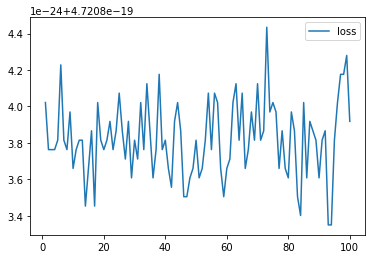

In [362]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [363]:
# Plot the accuracy
# history_df.plot(y="acc")

In [364]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [365]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [366]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

291/291 - 0s - loss: 4.8386e-19 - accuracy: 1.0000
Loss: 4.838631250232266e-19, Accuracy: 1.0


### Conclusion

### Summary / Conclusion 

1). How many neurons and layers did you select for your neural network model? Why?

- For the input layer, I added the number of input features equal to the number of variables in the feature DataFrame. In the hidden layers I added two hidden layers with only a few neurons in each layer.
- To create the second hidden layer, I added another Keras Dense class while defining our model. All of our hidden layers will use the relu activation function to identify nonlinear characteristics from the input values.
- In the output layer, I used the same parameters from our basic neural network including the sigmoid activation function. - The sigmoid activation function will help us predict whether or not school closure status will be the core factor of # of new cases, # of death of COVID 19.


2). Were you able to achieve the target model performance? What steps did you take to try and increase model performance?

- Looking at our deep learning model’s performance metrics, the model was able to correctly identify COVID 19 new Cases & death cases per School Closure Status approximately 100% of the time.
- The deep learning model was able to produce a fairly reliable classifier. I tried doubling the epochs from 100 to 200. When compared to the previous deep learning model, this model produced a less reliable classifier. This models accuracy was 1.0 (Loss: 4.838631250232266e-19), while the previous model was 0.8249165415763855.

3). If you were to implement a different model to solve this classification problem, which would you choose? Why?

- I would us a Random forest classifier.
- Random forest classifiers are a type of ensemble learning model that combines multiple smaller models into a more robust and accurate model. They use a number of weak learner algorithms and combine their output to make a final classification decision. Random forest models have been popular in machine learning algorithms for many years due to their robustness and scalability. Both output and feature selection of random forest models are easy to interpret, and they can easily handle outliers and nonlinear data.

### The End